# Ec 143 - Problem Set 4
# Production Function Estimation
Due by 5PM on April 10th. The GSI, Nadav Tadelis (ntadelis@berkeley.edu), will handle the logistics of problem set collection.

Working with peers on the problem set is actively encouraged, but everyone needs to turn in their own Jupyter Notebook and any other accompanying materials. 

This problem set reviews the material on production function estimation developed in lecture. Any "pencil and paper" and/or narrative answers may be placed in markdown boxes in this Jupyter notebook (preferred). Alternatively you can hand write your answers and turn in a pdf scan of them.

Any computational questions should be answered by writing the required code and executing it. This should be included in this notebook.

In [40]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


The datafile needed to complete this problem set is available on the course GitHub repository. This file is called *semiconductor_firms.out*. This file includes 5 years of data (2010 to 2014 inclusive) on 110 semi-conductor firms (NAICS 4-digit code 3344). This extract was constructed from the [*Compustat*](https://www.marketplace.spglobal.com/en/datasets/compustat-fundamentals-(8)?utm_source=google&utm_medium=cpc&utm_campaign=DMS_Marketplace_Search_Google&utm_term=&utm_content=586436401424&_bt=586436401424&_bk=&_bm=&_bn=g&_bg=133704002389&gclid=Cj0KCQjwr-SSBhC9ARIsANhzu17vcn9JW4yOskcTp4OtipZFTnC7xjdbrjWjqOJFDtD9YMe9NeJUkfMaAg2pEALw_wcB) datbase. This database is available to Berkeley students through the Haas Business School Library. Included in the file are the variables:  

**Y** : total real sales by the firm (in millions of 2009 US$)

**K** : capital stock (in millions of 2009 US$)  

**L** : employees (in thousands)  

**M** : materials expenditures (in millions of 2009 US$)  

**VA** : total real valued added by the firm (in millions of 2009 US$)  

**w** : annual wage rate (in 2009 US$)  

**i** : real investment (in millions of 2009 US$)  

**r&d** : total research & development spending (in millions of 2009 US$).  

The name of the firm is given in the **conm** column; **gvkey** is a unique firm *Compustat* firm identifier.

In [41]:
data = '/Users/simitiangreg/Documents/143/Datasets/'
graphics = '/Users/simitiangreg/Documents/143/Datasets/'

## PART I: Back-of-the-Envelope Productivity Analysis
We will begin by loading the dataset and doing some basic "back of the envelope" productivity analysis of the type discussed in Syverson (2011, _Journal of Economic Literature_). A copy of this paper can be found [here](http://home.uchicago.edu/syverson/productivitysurvey.pdf). I encourage you to have at least a quick look at this paper to get an overview of economic questions in productivity analysis. 

We will work with a so-called "valued added" production function. Value added is, roughly, a measure of firm output that takes into account the raw materials/inputs used in production:   

$$ O_{t}=A_{t}K_{t}^{\alpha}L_{t}^{\beta} $$  

where $O_{t}$ is valued added and $A_{t}$ is a firm's total factor productivity in period $t$.   

In our dataset we observe $VA_{t} = P_{t} \times O_{t}$ (i.e., total sales minus the cost of materials used). Further assume, in this part of the problem set, constant returns-to-scale (CRS) such that $\alpha = 1 - \beta$. 

### Question 1
Assume (unlike in the Olley-Pakes model discussed in lecture and also below), that firms are able to freely adjust their labor and capital input levels each period. Specifically that they choose capital and labor each period to maximize profits:

$$ \Pi_{t}=P_{t}O_{t}-W_{t}L_{t}-R_{t}K_{t}. $$

Show that this implies the equality:

$$ \beta=\frac{W_{t}L_{t}}{P_{t}O_{t}}. $$  

Use this result to justify the following, *time-specific*, estimate of $\beta$:

$$ \hat{\beta}_{t}=\frac{1}{N}\sum_{i=1}^{N}\frac{\frac{\text{W}_{it}(L_{it}\times1,000)}{1,000,000}}{\text{VA}_{it}}. $$  
Discuss this estimate; including any strengths and weaknesses you can think of. 

Next consider the following measure of productivity:

$$ \hat{TFPR}_{it}=\frac{\text{VA}_{it}}{K_{it}^{1-\hat{\beta}_{t}}\text{L}_{it}^{\hat{\beta}_{t}}} $$  

This is a revenue-based measure of productivity. How does it compare with the theoretical TFP measure, $A_{it}$? You might find [this](https://www.aeaweb.org/articles?id=10.1257/mac.20170282) article helpful. See also the Syverson (2011) survey.

$$--------------------------------Question-1.1--------------------------------$$

Substitute O_t: $\Pi_{t}=P_{t}A_{t}K_{t}^{\alpha}L_{t}^{\beta}-W_{t}L_{t}-R_{t}K_{t}$

Substitute 1-alpha=beta: $\Pi_{t}=P_{t}A_{t}K_{t}^{1-\beta}L_{t}^{\beta}-W_{t}L_{t}-R_{t}K_{t}$

Take the profit maximizing condition: $ \frac{\delta\Pi_{t}}{\delta L_{t}} = 0 = \beta P_{t}A_{t}K_{t}^{1-\beta}L_{t}^{\beta-1}- \frac{\delta W_{t}L_{t}}{\delta L_{t}} - \frac{R_{t}K_{t}}{\delta L_{t}}$

rearange: $ \beta P_{t}A_{t} (\frac{L_{t}}{K_{t}})^{\beta -1} = W_{t}$

rearange: $ \beta = \frac{W_{t}}{P_{t}}  (\frac{1}{A_{t}}) (\frac{L_{t}}{K_{t}})^{1-\beta}$

now we must show that: $  \frac{L_{t}}{O_{t}} = (\frac{1}{A_{t}}) (\frac{L_{t}}{K_{t}})^{1-\beta}$

which we have here: $  \frac{L_{t}}{O_{t}} = (\frac{L_{t}}{A_{t}K_{t}^{1-\beta}L_{t}^{\beta}}) = (\frac{1}{A_{t}K_{t}^{1-\beta}L_{t}^{\beta-1}}) = (\frac{1}{A_{t}}) (\frac{K_{t}^{\beta-1}}{L_{t}^{\beta-1}}) = (\frac{1}{A_{t}})(\frac{L_{t}}{K_{t}})^{1-\beta}$

substitue $\frac{L_{t}}{O_{t}}$ for $(\frac{1}{A_{t}})(\frac{L_{t}}{K_{t}})^{1-\beta} $ into $ \beta = \frac{W_{t}}{P_{t}}  (\frac{1}{A_{t}}) (\frac{L_{t}}{K_{t}})^{1-\beta}$

and finally get: $ \beta=\frac{W_{t}L_{t}}{P_{t}O_{t}}. $  

$$--------------------------------Question-1.2--------------------------------$$

For a specific unit of time (fixed t), $\hat\beta$ should be estimating total worker's compensation as a proportion of total sales (minus fixed costs). 

Because $L_{it}$ is originally in thousands, we should multiply it by 1000 to get the total number of workers. The indexing can be interpreted by considering different companies, 1...N, where each company has the same wage for all workers, $W_{it}$, associated to them at time t. $W_{it} * L_{it}$ is then wages at time t for the company, i. 

Because we are given $VA_{t} = P_{t} \times O_{t}$, we can directly substitute. We can think of $VA_{t}$ (value added) as equal to $P_{t} \times O_{t}$ because the firm's customers are willing to pay that much above the total costs for the product, meaning the the firm "adds" that much amount of "value" to the goods. This is measured in millions, so we multiply it by 1000000 in the denominator.

$\hat\beta_{t}$ is then our estimate for the value of $\beta$ created by taking an average of this ratio for all firms, for a given year.

$$--------------------------------Question-1.3--------------------------------$$

Multiplying both side of the equation by $P_{t}$, we have: $ P_{t}O_{t}=P_{t}A_{t}K_{t}^{1-\beta}L_{t}^{\beta} $

For a given time period, we know this is: $\text{VA}_{it}=P_{t}A_{t}K_{t}^{1-\hat{\beta}_{t}}L_{t}^{\hat{\beta}_{t}} $

Dividing both sides by $K_{t}^{1-\hat{\beta}_{t}}L_{t}^{\hat{\beta}_{t}}$, we have: $\frac{\text{VA}_{it}}{K_{t}^{1-\hat{\beta}_{t}}L_{t}^{\hat{\beta}_{t}}}=P_{t}A_{t} $

If $\hat{TFPR}_{it}=\frac{\text{VA}_{it}}{K_{it}^{1-\hat{\beta}_{t}}\text{L}_{it}^{\hat{\beta}_{t}}}$ , then we know that $\hat{TFPR}_{it} = P_{t}A_{t}$

Essentially, this firm measure of productivity, $\hat{TFPR}_{it}$ is the typical $A_{t}$ scaled by $P_{t}$.

$$--------------------------------------------------------------------------$$


Next we will load the dataset and organize it a bit. We will actually drop seven firms with at least one year where their measured value added is negative. This leaves us with 103 firms.

In [42]:
firms = pd.read_csv(data + 'semiconductor_firms.out', header = 0, sep='\t+', engine='python')
#read the csv file
firms.set_index(['gvkey','year'], inplace=True)
#set the index to (gvkey, year) pairs
firms.drop(['gvkey.1', 'year.1'], axis=1, inplace=True)
#drop the gvkey and year columns because we just turned them into our index
sample = firms.groupby('gvkey').filter(lambda g: ~ (g.VA <=0).any())
#we create a subset of the dataframe with only companies with positive VA
sample[0:5]

conm            Y            K       L  \
gvkey year                                                             
1161  2010  ADVANCED MICRO DEVICES  6569.283995  7780.788356  11.100   
      2011  ADVANCED MICRO DEVICES  6761.444940  2108.861479  11.093   
      2012  ADVANCED MICRO DEVICES  5576.869671  2279.734654  10.340   
      2013  ADVANCED MICRO DEVICES  5436.098402  2302.573526  10.671   
      2014  ADVANCED MICRO DEVICES  5622.785250  1834.114746   9.687   

                      M           VA             w           i          r&d  \
gvkey year                                                                    
1161  2010  3683.676331  2885.607664  58192.890525  146.079060  1386.764053   
      2011  3826.664337  2934.780603  60953.890816  241.732740  1404.950687   
      2012  3310.401201  2266.468469  62223.959351  126.189550  1284.666546   
      2013  3286.875560  2149.222842  62682.861774   78.837707  1127.191501   
      2014  3621.163044  2001.622205  64311.755155   87.691768   989.532372   

            naics_4digit  
gvkey year                
1161  2010          3344  
      2011          3344  
      2012          3344  
      2013          3344  
      2014          3344

In [43]:
sample['wage_bill'] = (sample['w']*sample['L']*1000)/1000000
#calculate the total wages paid by the firm in a given year

sample['beta_it'] = sample['wage_bill']/sample['VA']
#as we showed about, labor's share of sales, beta is this fraction

sample['beta_hat_t'] = sample['beta_it'].groupby(level=[1,1]).transform('mean')
#we want to find an estimate of beta across all firms for a given year, so we sum across firms, then divide by the number of firms. This is what the groupby and transform are doing.
sample['TFPR_it']=sample['VA']/((sample['K']**(1-sample['beta_hat_t']))*(sample['L']**(sample['beta_hat_t'])))

#using the math we did in question 1, we can calculate our TFPR = VA/(K^(1-B)L^(B))
sample[['beta_it','beta_hat_t','TFPR_it']]

beta_it  beta_hat_t    TFPR_it
gvkey  year                                 
1161   2010  0.223849    0.484157   8.850722
       2011  0.230396    0.496995  18.887648
       2012  0.283876    0.529683  17.326303
       2013  0.311224    0.527957  15.933980
       2014  0.311242    0.525514  17.166270
...               ...         ...        ...
264416 2010  0.682002    0.484157  18.848740
       2011  0.680917    0.496995  18.385700
       2012  0.799289    0.529683  18.645065
       2013  0.764297    0.527957  21.048952
       2014  0.697928    0.525514  22.378052

[515 rows x 3 columns]

### Question 2

$$--------------------------------Question-2--------------------------------$$
Comments shown above
$$--------------------------------------------------------------------------$$

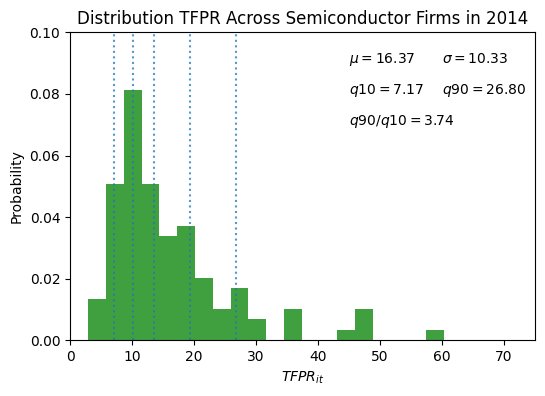

In [44]:
TFPR_2014 = sample.query('year == 2014')['TFPR_it']

fig, ax = plt.subplots(figsize = (6,4))
#Create the figure with dimensions height=4, length=6

n, bins, patches = plt.hist(TFPR_2014, 20, density=True, facecolor='g', alpha=0.75)
#create a histogram with 20 bins, normalize to 1, color green with opacity .75

plt.xlabel(r'$TFPR_{it}$')
#TFPR on xaxis

plt.ylabel('Probability')
#probability on y

plt.title('Distribution TFPR Across Semiconductor Firms in 2014')
#title

# Calculate percentiles
quantiles = [TFPR_2014.quantile(0.10), TFPR_2014.quantile(0.25), TFPR_2014.quantile(0.5), TFPR_2014.quantile(0.75), TFPR_2014.quantile(0.90)]
#10th, 25th, 50th, 75th and 90th percentiles are calculated using the quantile function


# Plot the lines with a loop
for q in quantiles:
    ax.axvline(q, alpha = 0.75, ymax = 1, linestyle = ":")
#go thru the loop and plot each of the 5 percentiles

plt.text(45, .09, r"$\mu = {0:.2f}$".format(np.mean(TFPR_2014)))
plt.text(60, .09, r"$\sigma = {0:.2f}$".format(np.std(TFPR_2014)))
plt.text(45, .08, r"$q10 = {0:.2f}$".format(quantiles[0]))
plt.text(60, .08, r"$q90 = {0:.2f}$".format(quantiles[4]))
plt.text(45, .07, r"$q90/q10 = {0:.2f}$".format(quantiles[4]/quantiles[0]))
plt.xlim(0, 75)
plt.ylim(0, 0.1)
plt.show()

#manually create the legend that shows mu, sigma, the 10th and 90th quantiles
#the 90/10 ratio is a good way to have a rough sense of inequality in productivity between the some of the most productive and least productive companies 

### Question 3
Furthermore comment on the plot. What does it suggest about the distribution of productivity across semi-conductor firms in 2014?

Text(0.5, 1.0, 'TFPR vs $\\beta_{it}$ in 2014')

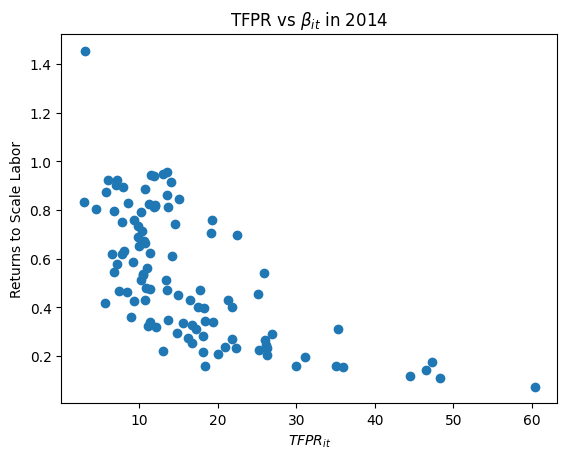

In [45]:
firms_2014 = sample.query('year == 2014')
plt.scatter(TFPR_2014, firms_2014['beta_it'])
plt.xlabel(r'$TFPR_{it}$')
plt.ylabel('Returns to Scale Labor')
plt.title(r'TFPR vs $\beta_{it}$ in 2014')

$$--------------------------------Question-3--------------------------------$$
Comments shown above

STATISTICAL:
The distribution seems to have a long tail, with a few firms having far higher TFPR in the year 2014. This displays that we have large outliers to the right of the median, with not many outliers to the left of the median. Thus, we can say that the average of this distribution would be skewed upward, and the mean would be larger than the median.

FUNDAMENTAL:
Keeping in mind that we assumed CRS, (alpha and beta need to add up to one), Looking at the new chart made above, we can see that the firms with the highest productivity have higher returns from capital. This makes sense, as the difference in residual could be attributed to the qualitative strenths of increased capital spending (the spending for capital goes into producing diversified products, as opposed to producing more products)

Caution: there are a few estimates of beta very close to 1 and one that is far higher than 1. We can see the firms for which this is true below. This is not an issue because the way we calculated this beta is by taking the wage bill over the sales number. These just indicate years where employees were paid more than the sales number. Ideally, this single observation would've been removed when we took out the negative VA's. 
$$--------------------------------------------------------------------------$$

In [58]:
subset = sample[['beta_it','beta_hat_t','TFPR_it', 'conm', 'VA', 'wage_bill']]
subset[subset['beta_it'] >= 1]

,beta_it,beta_hat_t,TFPR_it,conm,VA,wage_bill
gvkey,,,,,,
6021,1.044393,0.529683,4.554582,INRAD OPTICS INC,4.587589,4.791245
6021,1.117458,0.527957,4.015462,INRAD OPTICS INC,3.982685,4.450483
6021,1.456179,0.525514,3.037884,INRAD OPTICS INC,3.091531,4.501823
6848,1.026461,0.527957,5.478447,LGL GROUP INC,9.343243,9.590478
29435,1.095053,0.529683,5.880268,PLANAR SYSTEMS INC,23.979215,26.258511
31743,1.417810,0.529683,2.241741,ANADIGICS INC,22.119235,31.360876
31743,1.034904,0.527957,2.975940,ANADIGICS INC,28.891292,29.899725
64637,1.085318,0.529683,5.335745,EMCORE CORP,60.772410,65.957397
65036,1.728081,0.529683,2.507003,QUICKLOGIC CORP,3.096650,5.351261


In [46]:
gvkeys = list(set(sample.index.get_level_values(0).tolist()))
#get the unique gvkeys (company codes)

sample.reset_index(level='year', inplace=True)
#reset the index

N = len(gvkeys)
#get the number of companies

B = 100
#pick the number of bootstraps

boostrap_results = np.zeros((B,3))
#create a Bx3 matrix with all zeros, we will populate it eventually

for b in range(0,B):
               
    boostrap_sampled_firms = list(np.random.choice(gvkeys, size=(N,), replace=True))
    #draw N firms with replacement

    bs_sample = sample.loc[boostrap_sampled_firms]
    #set bs_sample equal to the time series data for each randomly sampled firm

    bs_sample.reset_index(level='gvkey', inplace=True)
    #change the index to gvkey

    bs_sample.set_index(['gvkey','year'], inplace=True)
    #change the (gvkey, year) pairs

    bs_sample['beta_hat_t'] = bs_sample['beta_it'].groupby(level=[1,1]).transform('mean')
    #calculate the 'beta_hat_t' for each time period from the sample

    bs_sample['TFPR_it']=bs_sample['VA']/((bs_sample['K']**(1-bs_sample['beta_hat_t']))*(bs_sample['L']**(bs_sample['beta_hat_t'])))
    #calculate the 'TFPR_it' (The TFPR at time t, for each comapny, i) based on what we already discussed above.

    bs_TFPR_2014 = bs_sample.query('year == 2014')['TFPR_it']
    #because the sample inlcudes every year of a subset of companies, we can find 2014.
    boostrap_results[b,:] = [bs_TFPR_2014.quantile(0.10), bs_TFPR_2014.quantile(0.90), bs_TFPR_2014.quantile(0.90)/bs_TFPR_2014.quantile(0.10)]
    #we now make the results of the 10th and 90th percentiles, and the ratio between them

    
BB=pd.DataFrame({'10th Percentile of TFPR': boostrap_results[:,0], '90th Percentile of TFPR': boostrap_results[:,1], \
                 '90-10 TFPR Ratio': boostrap_results[:,2]})

#create the BB dataframe with the bootstrap results of the 10th and 90th percentiles, manually calculate the 90/10 TFPR ratio

print('\n')
print('=======================================================================')
print('BOOTSTRAP RESULTS')
print('=======================================================================')
print('2.5, 5, 95, 97.5 Percentiles')
print('=======================================================================') 
print(BB.quantile(q=[0.025, 0.05, 0.95, 0.975]))
print('=======================================================================')
print('Summary Statistics')
print('=======================================================================')
print(BB.describe()) 
print('=======================================================================')

#Using the quantile function, we find the levels associated with each statistic.
#the two statistics in this case are the 10th and 90th percentiles of the original distribution.
#we also show the summary statistics of the BB dataframe.




BOOTSTRAP RESULTS
2.5, 5, 95, 97.5 Percentiles
       10th Percentile of TFPR  90th Percentile of TFPR  90-10 TFPR Ratio
0.025                 5.797433                22.600099          3.325331
0.050                 5.858654                23.656206          3.369182
0.950                 8.877219                36.613318          5.144938
0.975                 8.988288                38.590137          5.495554
Summary Statistics
       10th Percentile of TFPR  90th Percentile of TFPR  90-10 TFPR Ratio
count               100.000000               100.000000        100.000000
mean                  7.280132                28.920766          4.001391
std                   0.938239                 4.365412          0.588697
min                   5.250064                21.034181          3.057752
25%                   6.664343                25.497272          3.594534
50%                   7.200819                28.229530          3.814511
75%                   7.842041              

$$--------------------------------Question-4--------------------------------$$
Comments shown above

Note that we used a nonparametric bootstrap because we do not want to assume the distrbution is normal.
$$--------------------------------------------------------------------------$$

## PART II: Olley-Pakes Production Function Estimation
In this part of the problem set you will use the Olley-Pakes estimation prodcedure to recover estimates of $\alpha$ and $\beta$. You will also learn about features of the _evolution_ of productivity over time. You will then use this information to test for constant-returns-to-scale as well as to recover the distribution of productivity across semiconductor firms. You will compare your analyses with the back-of-the-envelope one undertaken in the first part of the problem set.

As before firms produce using the Cobb-Douglas technology:  

$$ O_{t}=K_{t}^{\alpha}L_{t}^{\beta}\exp\left(U_{t}+\varepsilon_{t}\right). $$

The firm chooses the period $t$ variable input level, $L_{t}$, to maximize _expected_ profits 

$$L_{t}=\arg\underset{l_{t}}{\max}\thinspace\mathbb{E}\left[\left.P_{t}K_{t}^{\alpha}l_{t}^{\beta}\exp\left(U_{t}+\varepsilon_{t}\right)-W_{t}l_{t}\right|\mathcal{I}_{t}\right],$$	

with $P_{t}$ and $W_{t}$ denoting the output and input price (assumed to be the same across all semiconductor firms). The beginning-of-period $t$ information set $\mathcal{I}_{t}$ includes $W_{1}^{t}=\left(W_{1},\ldots,W_{t}\right)'$, $P_{1}^{t}=\left(P_{1},\ldots,P_{t}\right)'$ and, $U_{1}^{t-1}=\left(U_{1},\ldots,U_{t-1}\right)'.$

We assume that TFP $A_{t} = \exp\left(U_{t}+\varepsilon_{t}\right)$ consists of two components. The first component, $U_{t}$ is persistent and evolves according the the following auto-regressive process:

$$ U_{t}=\lambda_{t}+\rho U_{t-1}+V_{t} $$ 

with $ \left.V_{t}\right|\mathcal{I}_{t}\sim\mathcal{N}\left(0,\sigma^{2}\right) $. Here $\lambda_{t}$ is a common period $t$ productivity shock, $\rho<1$ measures the persistence of a firm's productivity level over time and $V_{t}$ is the firm's innovation to productivity.

The second component of productvity, $\varepsilon_{t}$, is white noise and unforecastable. It is also Gaussian with $\left.\varepsilon_{t}\right|\mathcal{I}_{t}\sim\mathcal{N}\left(0,\tau^{2}\right)$.

Unlike labor, which is chosen period-by-period, the firm's capital stock evolves incrementally over time. Specifically, it evolves according to the rule

$$ K_{t+1}=\left(1-\delta\right)K_{t}+I_{t} $$

where $I_{t}$ equals total investment, or capital expenditures, made by the firm in period $t$. These capital expenditures help determine the capital stock available for production _next_ period. The capital depreciation rate is $\delta$. 

Firm's use the following investment rule:

$$ I_{t}=\omega_{t}\left(K_{t},U_{t}\right) $$

with $\omega_{t}\left(k,u\right)$ an unknown function which is strictly increasing in its second argument (and which may vary over time).

The timing of the firm's decision-making process each period is as follows:

1. At the beginning of the period the firm chooses $L_{t}$ to maximize expected profits. The period $t$ capital stock is determined in advance and hence treated as fixed when the firm chooses $L_{t}$. Expectations are conditional on the beginning-of-period $t$ information set $\mathcal{I}_{t}$.

2. After $L_{t}$ is chosen $U_{t}$ is observed. The firm then makes its period $t$ _investment_ decision using the rule $I_{t}=\omega_{t}\left(K_{t},U_{t}\right)$

3. $\varepsilon_{t}$ is realized and the firm produces output $O_{t}$.

### Question 5
Let $Y_{t} = \ln O_{t}$, $R_{t} = \ln L_{t}$, and $S_{t} = \ln K_{t}$. Show that
$$ Y_{t} = \beta R_{t}+h_{t}\left(S_{t},I_{t}\right)+\varepsilon_{t} $$
for some function $h_{t}\left(s,i\right)$ and where $\mathbb{E}\left[\left.\varepsilon_{t}\right|R_{t},S_{t},I_{t}\right]=0$.

$$--------------------------------Question-5--------------------------------$$

If:                         $ O_{t}=K_{t}^{\alpha_{t}}L_{t}^{\beta_{t}}\exp\left(U_{t}+\varepsilon_{t}\right) $

Then:                       $Y_{t} = \ln O_{t} = \alpha_{t} lnK_{t} + \beta_{t} lnL_{t} + U_{t}+\varepsilon_{t}$

Then:                       $Y_{t} =  \alpha_{t} S_{t} + \beta_{t} R_{t} + U_{t}+\varepsilon_{t}$

Then:                       $Y_{t} =  \beta_{t} R_{t} + \alpha_{t} S_{t} + U_{t} + \varepsilon_{t}$

Therefore we should show:   $h_{t}\left(S_{t}, I_{t}\right) = \alpha_{t} S_{t} + U_{t}$

Because we have:            $ I_{t}=\omega_{t}\left(K_{t},U_{t}\right) $

The inverse:                $ U_{t}=\omega_{t}^{-1}\left(K_{t},I_{t}\right) $

We can substitute:          $h_{t}\left(S_{t}, I_{t}\right) = \alpha_{t} S_{t} + \nu_{t}^{-1}\left(K_{t},I_{t}\right)$

Showing that:               $h_{t}$ is indeed a function of $S_{t}$ and $U_{t}$

Now we can get:             $Y_{t} = \beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right)+\varepsilon_{t}$

$$------------------------------------------------------------------------$$


### Question 6
Assume that $h_{t}\left(s,i\right)$ is well-approximated by a second order polynomial (as discussed in lecture) and argue that, consequently, $\beta$ can be consistently estimated by a particular least squares fit. 

Describe this least squares fit and estimate  $\beta$ using the $t=2013$ output and input data.

$$--------------------------------Question-6--------------------------------$$

$\text{First broke it down into form that we can estimate using a Partially Linear Regression Model (PLM). Skip to bottom for second degree polynomial approximation.}$

Because: $\mathbb{E}\left[\left.\varepsilon_{t}\right|R_{t},S_{t},I_{t}\right]=0$

We can see: $\mathbb{E}\left[\left.Y_{t}\right|R_{t},S_{t},I_{t}\right]= \beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right)$

Also: $\mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right]= \mathbb{E}\left[\beta_{t} R_{t}+h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right]$

split: $\mathbb{E}\left[\beta_{t} R_{t}+h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right] = \mathbb{E}\left[\beta_{t} R_{t}|S_{t},I_{t}\right] + \mathbb{E}\left[h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right]$

constant leaves expectation: $\mathbb{E}\left[\beta_{t} R_{t}+h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right] = \beta_{t}\mathbb{E}\left[R_{t}|S_{t},I_{t}\right] + \mathbb{E}\left[h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right]$

now we can recover $\beta_{t}$:

$$Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right] = \beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right) +\varepsilon_{t} - [\mathbb{E}\left[\beta_{t} R_{t}+h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right]]$$

$$Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right] = \beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right) +\varepsilon_{t} - [\beta_{t}\mathbb{E}\left[R_{t}|S_{t},I_{t}\right] + \mathbb{E}\left[h_{t}\left(S_{t},I_{t})+\varepsilon_{t}\right|S_{t},I_{t}\right]]$$


Given $S_{t}$ and $I_{t}$, we have $h_{t}(S_{t},I_{t})$ and because the information set, $\mathcal{I}_{t}$, only inlcudes $L_1$ to $L_{t-1}$. 

Because $R_{t}$ is just a transformation of $L_{t}$ we can see that $\mathbb{E}\left[\left.\varepsilon_{t}\right|R_{t},S_{t},I_{t}\right]= \mathbb{E}\left[\left.\varepsilon_{t}\right|S_{t},I_{t}\right]$ because $\mathbb{E}\left[\left.\varepsilon_{t}\right| \mathcal{I}_{t}\right] =0$

Thus:

$$\beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right) + \varepsilon_{t} - [\beta_{t}\mathbb{E}\left[R_{t}|S_{t},I_{t}\right] + h_{t}(S_{t},I_{t})] = Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right]$$

$$\beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right) + \varepsilon_{t} - \beta_{t}\mathbb{E}\left[R_{t}|S_{t},I_{t}\right] - h_{t}(S_{t},I_{t}) = Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right]$$

$$\beta_{t} R_{t} + \varepsilon_{t} - \beta_{t}\mathbb{E}\left[R_{t}|S_{t},I_{t}\right] = Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right]$$

$$\beta_{t} [R_{t} - \mathbb{E}\left[R_{t}|S_{t},I_{t}\right]] + \varepsilon_{t}= Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right]$$

$$\beta_{t} = \frac{Y_{t} - \mathbb{E}\left[\left.Y_{t}\right|S_{t},I_{t}\right] - \varepsilon_{t}}{R_{t} - \mathbb{E}\left[R_{t}|S_{t},I_{t}\right]}$$

$$------------------------------------------------------------------------$$

$\text{Second order polynomial approximation:}$

If we assume: $h_{t}(S_{t},I_{t})≈ \pi_{0t} + \pi_{1t}S_{t} + \pi_{2t}I_{t} +\pi_{3t}S_{t}I_{t} + \pi_{4t}S_{t}^2 +\pi_{5t}I_{t}^2$

And: $\mathbb{E}\left[\left.Y_{t}\right|R_{t},S_{t},I_{t}\right]= \beta_{t} R_{t}+h_{t}\left(S_{t},I_{t}\right)$

Then: $\mathbb{E}\left[\left.Y_{t}\right|R_{t},S_{t},I_{t}\right]= \beta_{t} R_{t}+\pi_{0t} + \pi_{1t}S_{t} + \pi_{2t}I_{t} +\pi_{3t}S_{t}I_{t} + \pi_{4t}S_{t}^2 +\pi_{5t}I_{t}^2$

$$------------------------------------------------------------------------$$

$\text{Because we have Y and I directly, we can apply log transforms to L and K to get R and S respectively.} \\ \text{We can then add a constant column and run a regression to estimate beta. The computation is below}$

$ \hat\beta_{2013} = 0.6166$

$$------------------------------------------------------------------------$$

In [47]:
sample2013 = sample.query('year == 2013')

sample2013['log(Y)'] = np.log(sample2013['Y'])
sample2013['R'] = np.log(sample2013['L'])
sample2013['S'] = np.log(sample2013['K'])
sample2013 = sample2013[['log(Y)', 'R', 'S', 'i']]


sample2013['constant'] = np.ones((len(sample2013),1))
sample2013['iS'] = sample2013['i']*sample2013['S']
sample2013['S^2'] = sample2013['S']**2
sample2013['i^2'] = sample2013['i']**2

sample2013 = sample2013[['log(Y)', 'R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
sample2013.head()

/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/306917349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2013['log(Y)'] = np.log(sample2013['Y'])
/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/306917349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2013['R'] = np.log(sample2013['L'])
/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/306917349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,log(Y),R,constant,S,i,iS,S^2,i^2
gvkey,,,,,,,,
1161,8.600817,2.367530,1.0,7.741783,78.837707,610.344396,59.935199,6215.384037
1327,7.516631,1.558145,1.0,6.663593,116.191763,774.254672,44.403478,13500.525867
1632,7.901684,2.208274,1.0,7.875065,115.510380,909.651707,62.016643,13342.647957
2577,6.040385,1.070898,1.0,5.953955,13.122724,78.132112,35.449583,172.205886
2829,3.626275,-1.931022,1.0,1.156653,0.263731,0.305045,1.337845,0.069554


$$ \text{Regression}$$

In [48]:
X_r13 = sample2013[['R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
Y_r13 = sample2013[['log(Y)']]
robustmodel2013 = sm.RLM(Y_r13, X_r13, M=sm.robust.norms.HuberT()).fit()
print(robustmodel2013.summary())
beta2013 = (robustmodel2013.params)[0]
print(beta2013)

                    Robust linear Model Regression Results                    
Dep. Variable:                 log(Y)   No. Observations:                  103
Model:                            RLM   Df Residuals:                       96
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 15 Jun 2023                                         
Time:                        13:06:54                                         
No. Iterations:                    47                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
R              0.6166      0.074      8.346      0.0

### Question 7
Describe how to use your first step estimates of $\beta$ and $h_{t}\left(s,i\right)$ to recover recover estimates of $\lambda_{t+t}$, $\rho$ and $\alpha$ using a particular least squares fit. Implement this procedure using the $t=2014$ output and input data.

$$--------------------------------Question-7--------------------------------$$

$h_{t}\left(S_{t}, I_{t}\right) = \alpha_{t} S_{t} + U_{t}$

We have our estimates: $\alpha_{t} S_{t} + U_{t} = \hat\beta_{t} R_{t}+\hat\pi_{0t} + \hat\pi_{1t}S_{t} + \hat\pi_{2t}I_{t} +\hat\pi_{3t}S_{t}I_{t} + \hat\pi_{4t}S_{t}^2 +\hat\pi_{5t}I_{t}^2$

So we can sum and have a single value to regress onto: $\alpha_{t} S_{t} + U_{t} = \hat h_{t}(\hat S_{t}, \hat I_{t})$

Essentially we can multiply each column by our coefficient estimates and sum go her the output of our function.

We can then regress $S_{t}$ onto $\hat h_{t}$ to get estimates for $\alpha_{t}$ and $U_{t}$\

We can do this for $U_{2013}$ and $U_{2014}$

We want: $U_{t+1} =λ_{t} +ρU_{t} +V_{t}$

In our case: $U_{2014} =λ_{2014} +ρU_{2013} +V_{2014}$

If $M_{2013}$ is our 2013 design matrix, and $\vec{coefs}_{2013}$ is our estiamted coefficients, through substitution we have:

$Y_{2014} -\beta R_{2014} = \alpha S_{2014} + λ_{2014} + ρ(M_{2013}*\vec {coefs}_{2013}) +V_{2014} + \varepsilon_{2014}$


We'll be able to estimate $λ_{2014}$, $ρ$ and $\alpha$ through our regression coefficients.

$\text{IMPORTANT: We need to get } \hat\beta_{2013} \text{ to calculate } \hat h(S,I) \text{but then we need to use } \hat \beta_{2014} \text{ to get } \hat \alpha_{2014},  \hat \lambda_{2014}, \hat \rho_{2014}$

$$-----------------------------------------------------------------------$$


In [49]:
vector2013 = (robustmodel2013.params).T
scaled2013 = sample2013[['R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]*vector2013
scaled2013 = scaled2013[['constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
scaled2013['hat_h'] = scaled2013.sum(axis=1)
scaled2013 = scaled2013[['hat_h']]
scaled2013.head()

,hat_h
gvkey,
1161,6.209429
1327,6.377652
1632,6.307627
2577,5.880319
2829,4.412719


In [59]:
#We need to re-estimate Beta for 2014, so some of this code will look the same
sample2014 = sample.query('year == 2014')

sample2014['log(Y)'] = np.log(sample2014['Y'])
sample2014['R'] = np.log(sample2014['L'])
sample2014['S'] = np.log(sample2014['K'])
sample2014 = sample2014[['log(Y)', 'R', 'S', 'i']]


sample2014['constant'] = np.ones((len(sample2014),1))
sample2014['iS'] = sample2014['i']*sample2014['S']
sample2014['S^2'] = sample2014['S']**2
sample2014['i^2'] = sample2014['i']**2

sample2014 = sample2014[['log(Y)', 'R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]

X_r14 = sample2014[['R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
Y_r14 = sample2014[['log(Y)']]
robustmodel2014 = sm.RLM(Y_r14, X_r14, M=sm.robust.norms.HuberT()).fit()

#Beta for 2014
beta2014 = (robustmodel2014.params)[0]


sample2014['log(Y)-Beta*R'] = sample2014['log(Y)'] - (beta2014 * sample2014['R'])
sample2014.head()
beta2014


/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/2715061278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2014['log(Y)'] = np.log(sample2014['Y'])
/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/2715061278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2014['R'] = np.log(sample2014['L'])
/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/2715061278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

0.6225173245956654

In [51]:
sample2014_reg = sample2014[['log(Y)-Beta*R','S']]
sample2014_reg['hat_h_2013'] = scaled2013['hat_h']
sample2014_reg['constant'] = np.ones((len(sample2014_reg),1))


X_final = sample2014_reg[['S', 'hat_h_2013','constant']]
Y_final = sample2014_reg[['log(Y)-Beta*R']]
robustmodel_final = sm.RLM(Y_final, X_final, M=sm.robust.norms.HuberT()).fit()
print(robustmodel_final.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          log(Y)-Beta*R   No. Observations:                  103
Model:                            RLM   Df Residuals:                      100
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 15 Jun 2023                                         
Time:                        13:06:54                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
S              0.0797      0.078      1.028      0.3

/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/2044504055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2014_reg['hat_h_2013'] = scaled2013['hat_h']
/var/folders/9d/_m9fdg9x3g5b_r_ckwc_cx5c0000gn/T/ipykernel_69952/2044504055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample2014_reg['constant'] = np.ones((len(sample2014_reg),1))


$$--------------------------------Question-7 (continued)--------------------------------$$

During the first part:

$\hat\beta = 0.622$

During the second part:

$\hat\alpha = 0.0797$

$\hat \rho = 0.7930$

$\hat\lambda_{2014} = .0.7894$

$$-----------------------------------------------------------------------$$


### Question 8
Construct estimates of $A_{t}$ for $t=2014$ based on the production function estimated in questions $7$ and $8$ above. Calculate the 10th and 90th percentiles of your estimated TFP distribution. Additionally construct an estimate of firms' returns-to-scale. Use the bootstrap to construct 95 percent confidence intervals for the 10th and 90th percentiles of the distribution of semiconductor firms' TFP in 2014. Similarly construct a confidence interval for returns-to-scale: $\eta=\alpha+\beta$.

In [52]:
data_2014 = sample.query('year == 2014')
data_2014.head()

,year,conm,Y,K,L,M,VA,w,i,r&d,naics_4digit,wage_bill,beta_it,beta_hat_t,TFPR_it
gvkey,,,,,,,,,,,,,,,
1161,2014,ADVANCED MICRO DEVICES,5622.785250,1834.114746,9.687,3621.163044,2001.622205,64311.755155,87.691768,989.532372,3344,622.987972,0.311242,0.525514,17.166270
1327,2014,SKYWORKS SOLUTIONS INC,2340.103959,853.776069,5.550,1017.006423,1323.097536,64311.755155,192.552661,232.798567,3344,356.930241,0.269769,0.525514,21.856171
1632,2014,ANALOG DEVICES,2925.536391,2707.300485,9.600,661.251596,2264.284795,64311.755155,164.226374,516.630052,3344,617.392849,0.272666,0.525514,16.219729
2577,2014,CTS CORP,412.590505,301.806152,2.948,131.363165,281.227340,64311.755155,11.952850,20.827256,3344,189.591054,0.674156,0.525514,10.610071
2829,2014,R F INDUSTRIES LTD,23.605282,3.259000,0.143,11.490081,12.115201,64311.755155,0.136615,0.000000,3344,9.196581,0.759094,0.525514,19.220389


$$--------------------------------Question-8.1--------------------------------$$

$\hat A_{2014}= \frac{1}{N}\sum_{i=1}^{N=103} \frac{O_{i,2014}}{K_{i,2014}^{\hat\alpha} L_{i,2014}^{\hat\beta}} = 286.72$

$$--------------------------------Question-8.2--------------------------------$$

$ 10\text{th percentile: } \hat A_{2014} = 80.21$

$ 90\text{th percentile: } \hat A_{2014} = 596.09$

$$--------------------------------Question-8.3--------------------------------$$

$\hat\eta=\hat\alpha+\hat\beta = 0.622 + 0.0797$

$\hat\eta= 0.701$

$$--------------------------------Question-8.4--------------------------------$$

$$-----------------------------------------------------------------------$$


In [53]:
#Question 8.1
data_2014 = data_2014[['Y', 'K', 'L']]
alpha2014 = (robustmodel_final.params)[0]
#lambda2014 = (robustmodel_final.params)[2]

data_2014['K^a'] = data_2014['K']**alpha2014
data_2014['L^b'] = data_2014['L']**beta2014

data_2014['A_i,2014'] = data_2014['Y']/(data_2014['L^b'] * data_2014['K^a'])
mean = data_2014['A_i,2014'].mean()
A_2014 = mean
A_2014

286.7190013740538

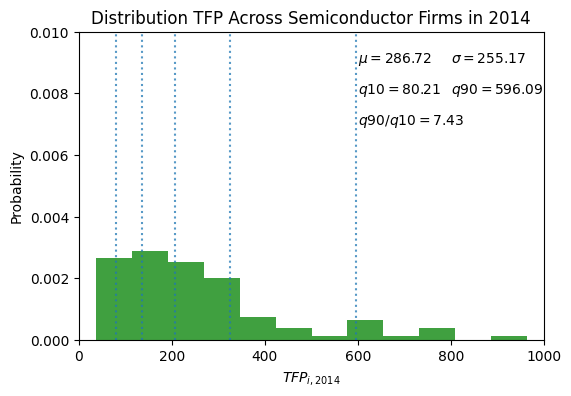

In [54]:
#Question 8.2

data_series= data_2014['A_i,2014']

fig, ax = plt.subplots(figsize = (6,4))
n, bins, patches = plt.hist(data_series, 20, density=True, facecolor='g', alpha=0.75)

plt.xlabel(r'$TFP_{i,2014}$')
#TFPR on xaxis

plt.ylabel('Probability')
#probability on y

plt.title('Distribution TFP Across Semiconductor Firms in 2014')
#title

# Calculate percentiles
quantiles = [data_series.quantile(0.10), data_series.quantile(0.25), data_series.quantile(0.5), data_series.quantile(0.75), data_series.quantile(0.90)]
#10th, 25th, 50th, 75th and 90th percentiles are calculated using the quantile function


# Plot the lines with a loop
for q in quantiles:
    ax.axvline(q, alpha = 0.75, ymax = 1, linestyle = ":")
#go thru the loop and plot each of the 5 percentiles

plt.text(600, 0.009, r"$\mu = {0:.2f}$".format(np.mean(data_series)))
plt.text(800, 0.009, r"$\sigma = {0:.2f}$".format(np.std(data_series)))
plt.text(600, 0.008, r"$q10 = {0:.2f}$".format(quantiles[0]))
plt.text(800, 0.008, r"$q90 = {0:.2f}$".format(quantiles[4]))
plt.text(600, 0.007, r"$q90/q10 = {0:.2f}$".format(quantiles[4]/quantiles[0]))
plt.xlim(0, 1000)
plt.ylim(0, 0.01)
plt.show()

#manually create the legend that shows mu, sigma, the 10th and 90th quantiles
#the 90/10 ratio is a good way to have a rough sense of inequality in productivity between the some of the most productive and least productive companies 

Scratch below

In [55]:
# gvkeys = list(set(sample.index.get_level_values(0).tolist()))
# #get the unique gvkeys (company codes)

# sample.reset_index(level='year', inplace=True)
# #reset the index

# N = len(gvkeys)
# #get the number of companies

# B = 10
# #pick the number of bootstraps

# boostrap_results = np.zeros((B,3))
# #create a Bx3 matrix with all zeros, we will populate it eventually

# for b in range(0,B):
               
#     boostrap_sampled_firms = list(np.random.choice(gvkeys, size=(N,), replace=True))
#     #draw N firms with replacement

#     bs_sample = sample.loc[boostrap_sampled_firms]
#     #set bs_sample equal to the time series data for each randomly sampled firm

#     bs_sample.reset_index(level='gvkey', inplace=True)
#     #change the index to gvkey

#     bs_sample.set_index(['gvkey','year'], inplace=True)
#     #change the (gvkey, year) pairs

#     ####################
#     bs_sample['log(Y)'] = np.log(bs_sample['Y'])
#     bs_sample['R'] = np.log(bs_sample['L'])
#     bs_sample['S'] = np.log(bs_sample['K'])
#     bs_sample = bs_sample[['log(Y)', 'R', 'S', 'i']]


#     bs_sample['constant'] = np.ones((len(bs_sample),1))
#     bs_sample['iS'] = bs_sample['i']*bs_sample['S']
#     bs_sample['S^2'] = bs_sample['S']**2
#     bs_sample['i^2'] = bs_sample['i']**2

#     bs_sample = bs_sample[['log(Y)', 'R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
#     X = bs_sample[['R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
#     Y = bs_sample[['log(Y)']]
#     robustmodel2013 = sm.RLM(Y, X, M=sm.robust.norms.HuberT()).fit()
#     beta_minus = (robustmodel2013.params)[0]

#     vector_minus = (robustmodel2013.params).T
#     bs_minus = bs_sample[['R','constant', 'S', 'i', 'iS', 'S^2', 'i^2']]*vector_minus
#     bs_minus = bs_minus[['constant', 'S', 'i', 'iS', 'S^2', 'i^2']]
#     bs_minus['hat_h'] = scaled2013.sum(axis=1)
#     bs_minus = bs_minus[['hat_h']]

    
 
#     ############

#     bs_sample['hat_h'] 

#     bs_sample['beta_hat_t'] = bs_sample['beta_it'].groupby(level=[1,1]).transform('mean')
#     #calculate the 'beta_hat_t' for each time period from the sample

#     bs_sample['TFPR_it']=bs_sample['VA']/((bs_sample['K']**(1-bs_sample['beta_hat_t']))*(bs_sample['L']**(bs_sample['beta_hat_t'])))
#     #calculate the 'TFPR_it' (The TFPR at time t, for each comapny, i) based on what we already discussed above.

#     bs_TFPR_2014 = bs_sample.query('year == 2014')['TFPR_it']
#     #because the sample inlcudes every year of a subset of companies, we can find 2014.
#     boostrap_results[b,:] = [bs_TFPR_2014.quantile(0.10), bs_TFPR_2014.quantile(0.90), bs_TFPR_2014.quantile(0.90)/bs_TFPR_2014.quantile(0.10)]
#     #we now make the results of the 10th and 90th percentiles, and the ratio between them

    
# BB=pd.DataFrame({'10th Percentile of TFPR': boostrap_results[:,0], '90th Percentile of TFPR': boostrap_results[:,1], \
#                  '90-10 TFPR Ratio': boostrap_results[:,2]})

# #create the BB dataframe with the bootstrap results of the 10th and 90th percentiles, manually calculate the 90/10 TFPR ratio

# print('\n')
# print('=======================================================================')
# print('BOOTSTRAP RESULTS')
# print('=======================================================================')
# print('2.5, 5, 95, 97.5 Percentiles')
# print('=======================================================================') 
# print(BB.quantile(q=[0.025, 0.05, 0.95, 0.975]))
# print('=======================================================================')
# print('Summary Statistics')
# print('=======================================================================')
# print(BB.describe()) 
# print('=======================================================================')

# #Using the quantile function, we find the levels associated with each statistic.
# #the two statistics in this case are the 10th and 90th percentiles of the original distribution.
# #we also show the summary statistics of the BB dataframe.


### Next steps
Let $X_t$ be the logarithm of research and development spending in period $t$. Assume that productivity now evolves according to

$$ U_{t}=\lambda_{t}+\rho U_{t-1}+\gamma X_{t-1}+V_{t} $$ 

with $ \left.V_{t}\right|\mathcal{I}_{t}\sim\mathcal{N}\left(0,\sigma^{2}\right) $ as earlier. Modify your analysis above as needed to accommodate the role of R&D in driving productivity. Does your analysis provide evidence for $\gamma$ differing from zero? Do other aspects of your analysis change after explicitly incorporating R&D into your analysis? 

We shouldn not make any assumptions about our result. Unlike capital investment, investment in 'ideas' (research) can be very hetrogenous (some years we will produce no new results, other years we can have huge breakthroughs)